In [1]:
import pandas as pd

In [2]:
spam = pd.read_csv('spam.csv', encoding='latin-1')
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
spam["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [4]:
import sys
sys.path.append("../Handlers")
import preprocessing

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from functools import partial

preprocession = partial(
    preprocessing.preprocess_text,
    remove_numbers=True,
)

preprocessed_data = spam["Message"].apply(preprocession)
preprocessed_data

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [6]:
import itertools

combined = list(itertools.chain.from_iterable(preprocessed_data))
len(combined)

50293

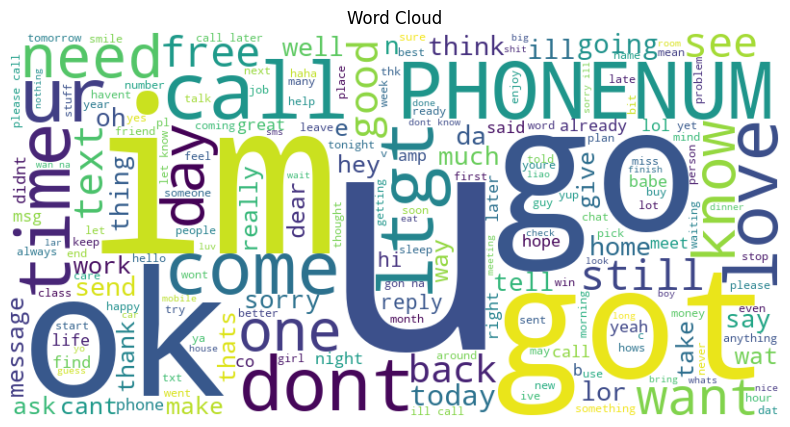

In [7]:
preprocessing.visualize_wordcloud(combined)

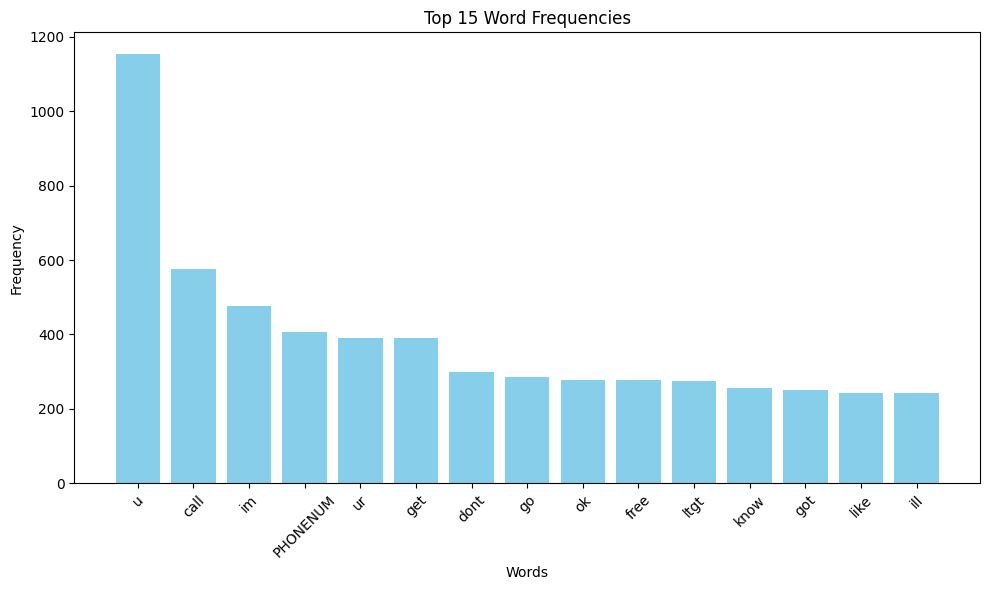

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(combined)
most_common = counter.most_common(15)

words, counts = zip(*most_common)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 15 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

spam["Category_encoded"] = LabelEncoder().fit_transform(spam["Category"])
spam["Category_encoded"].value_counts()

0    4825
1     747
Name: Category_encoded, dtype: int64

## Stemming + CountVectorizer

In [10]:
spam_stemming = preprocessed_data.apply(preprocessing.stemming)

SVC SMS Spam classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



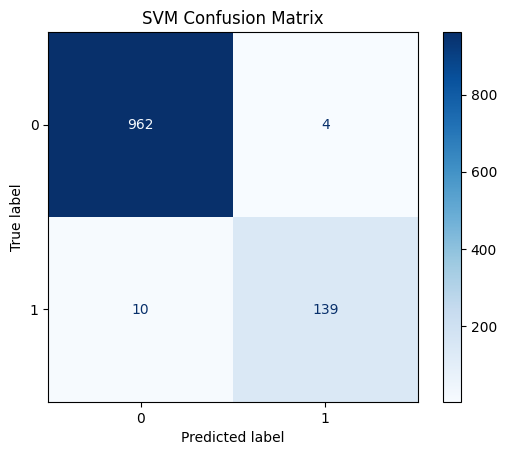



SVC SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



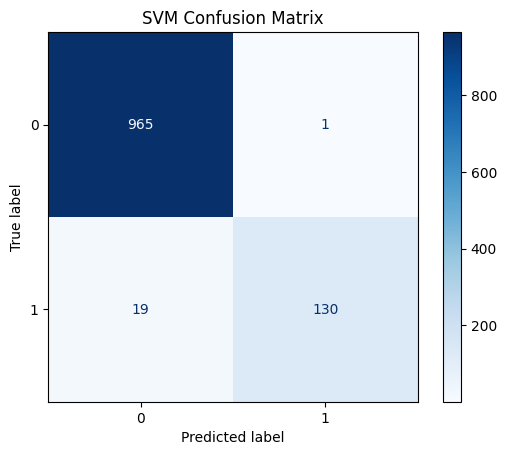



MultinomialNB SMS Spam classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.93      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



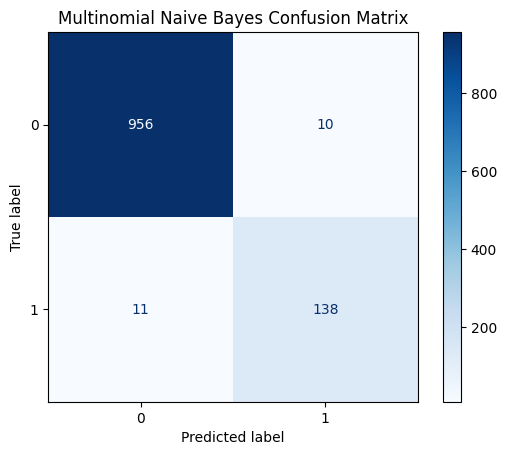



BernoulliNB SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



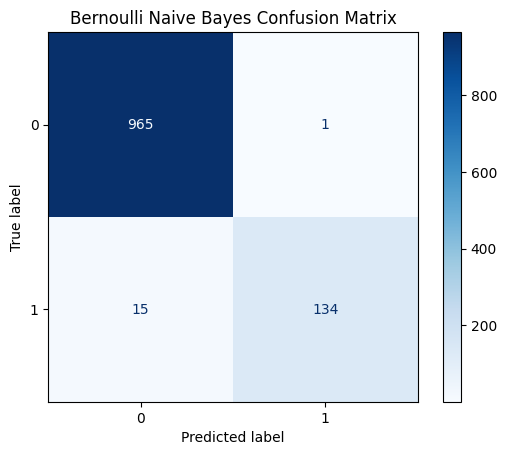



RandomForestClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



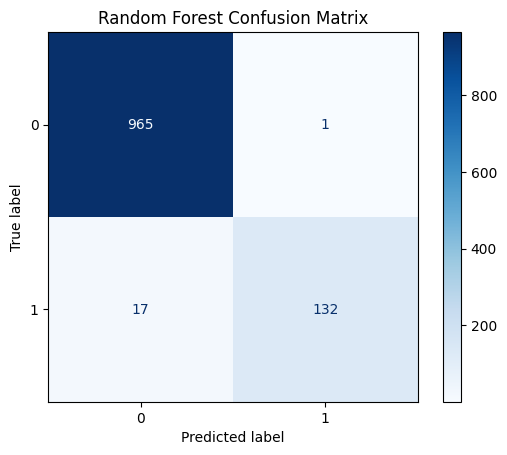



DecisionTreeClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.88      0.91      0.89       149

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



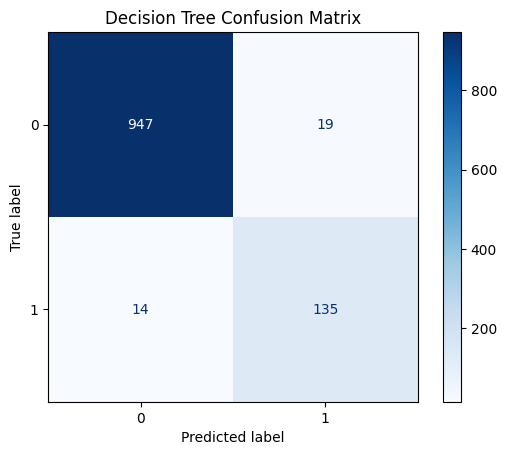



AdaBoostClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



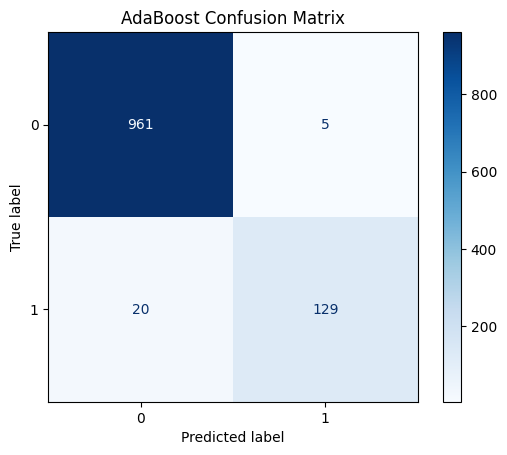



LogisticRegression SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



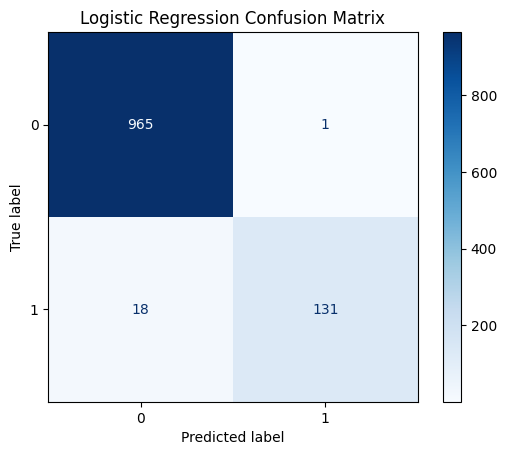



KNeighborsClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       1.00      0.52      0.68       149

    accuracy                           0.94      1115
   macro avg       0.97      0.76      0.82      1115
weighted avg       0.94      0.94      0.93      1115



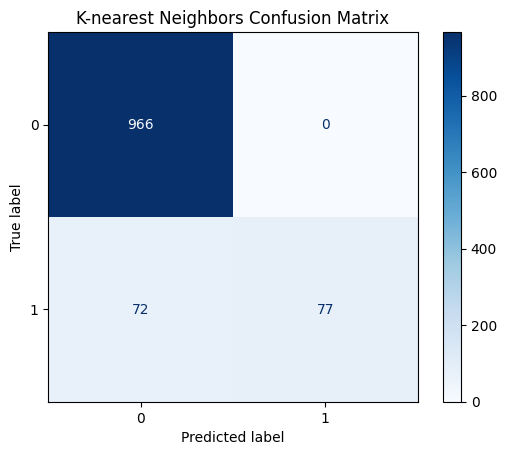

In [11]:
spam_stemming_countvec = preprocessing.vectorizing(spam_stemming, "countvectorizer")

from traintest import ClassificationModel, models
for model in models:
    spam_assassin_classify = ClassificationModel(model)
    spam_assassin_classify.train(spam_stemming_countvec, spam["Category_encoded"])
    print(f"{model.__class__.__name__} SMS Spam classification report")
    print(spam_assassin_classify.evaluate())
    spam_assassin_classify.draw_confusion_matrix()
    print("\n")

## Stemming + TF-IDF

SVC SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



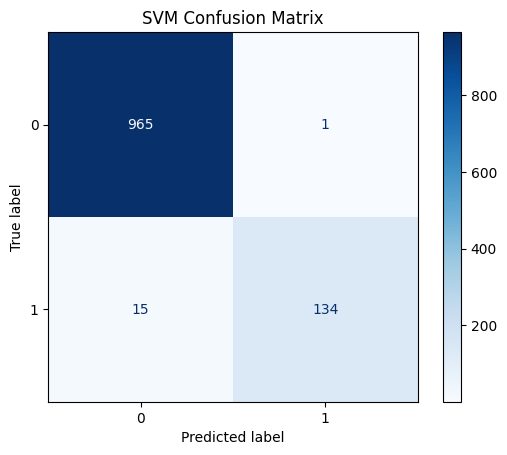



SVC SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



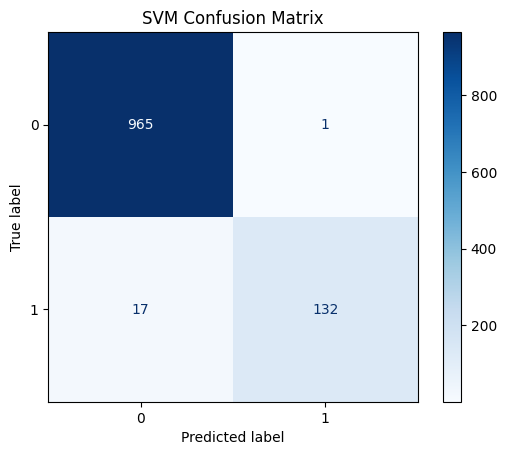



MultinomialNB SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



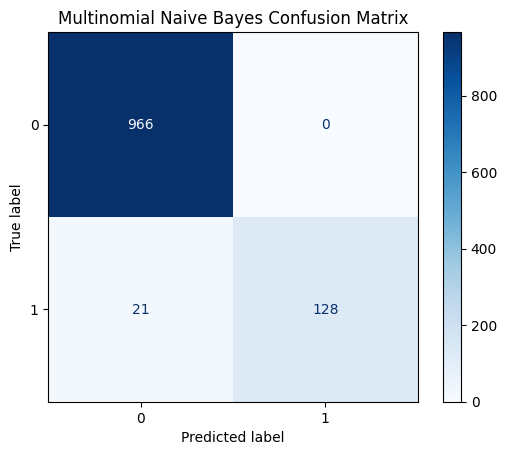



BernoulliNB SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



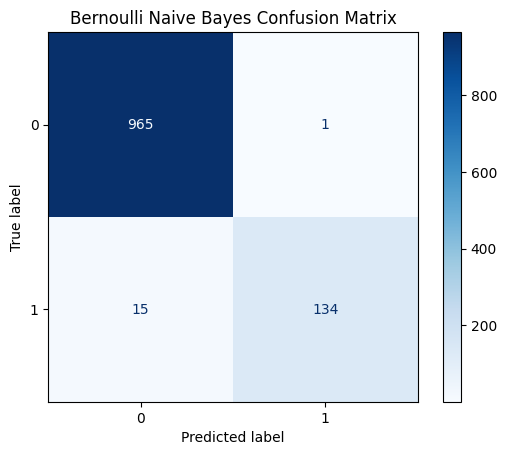



RandomForestClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



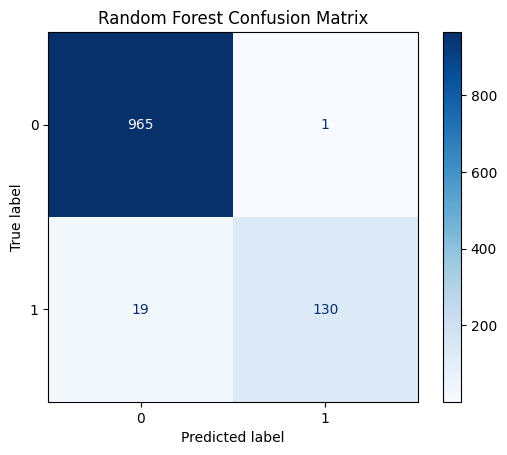



DecisionTreeClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.86      0.89      0.88       149

    accuracy                           0.97      1115
   macro avg       0.92      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



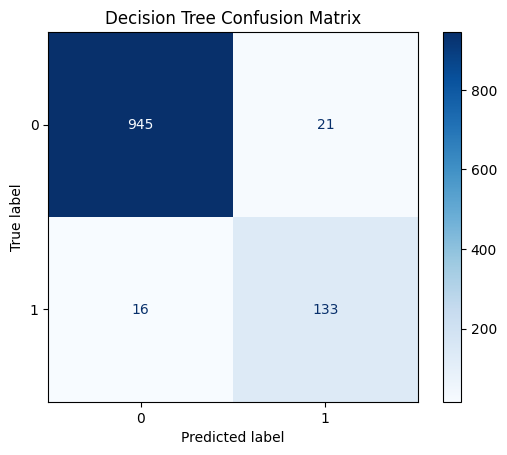



AdaBoostClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.94      0.87      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



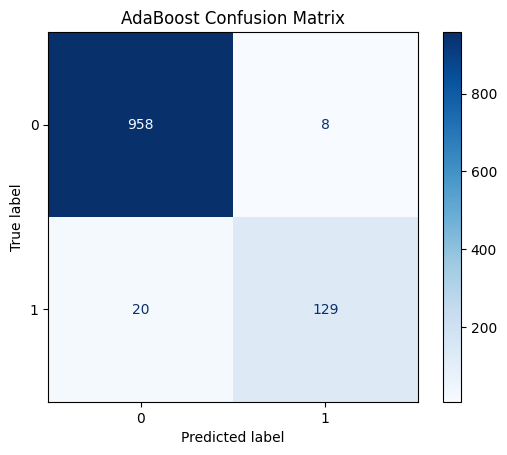



LogisticRegression SMS Spam classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.75      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



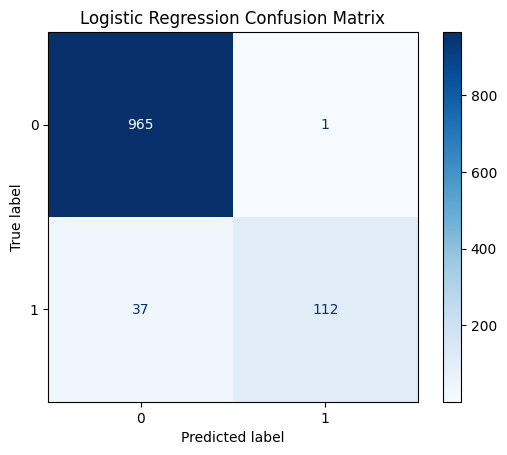



KNeighborsClassifier SMS Spam classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.46      0.63       149

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.80      1115
weighted avg       0.93      0.93      0.92      1115



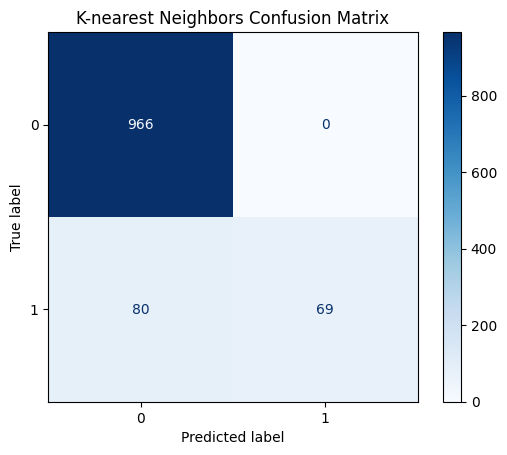

In [12]:
spam_stemming_tfidf = preprocessing.vectorizing(spam_stemming, "tfidf")
for model in models:
    spam_assassin_classify = ClassificationModel(model)
    spam_assassin_classify.train(spam_stemming_tfidf, spam["Category_encoded"])
    print(f"{model.__class__.__name__} SMS Spam classification report")
    print(spam_assassin_classify.evaluate())
    spam_assassin_classify.draw_confusion_matrix()
    print("\n")

## Lemmatizing + CountVectorizer

In [13]:
spam_lemmatizing = preprocessed_data.apply(preprocessing.lemmatizing)

SVC ling classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



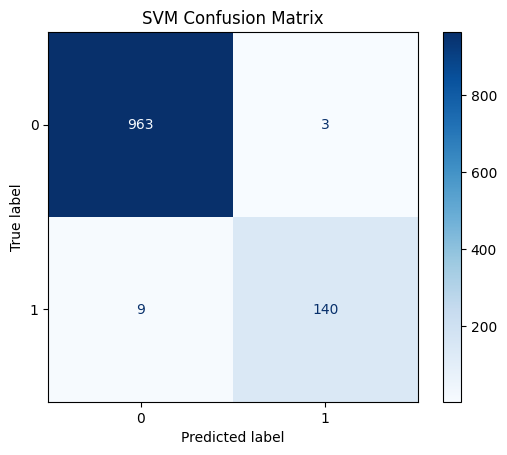



SVC ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



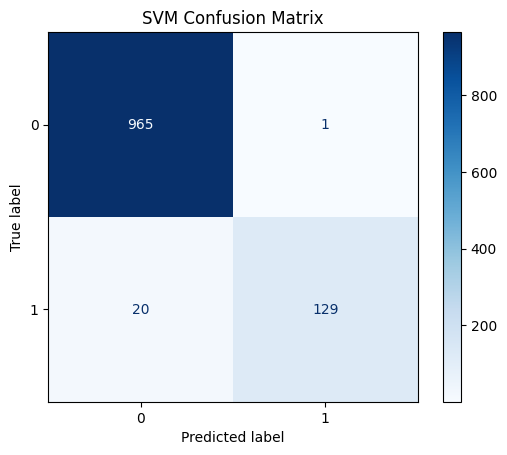



MultinomialNB ling classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.93      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



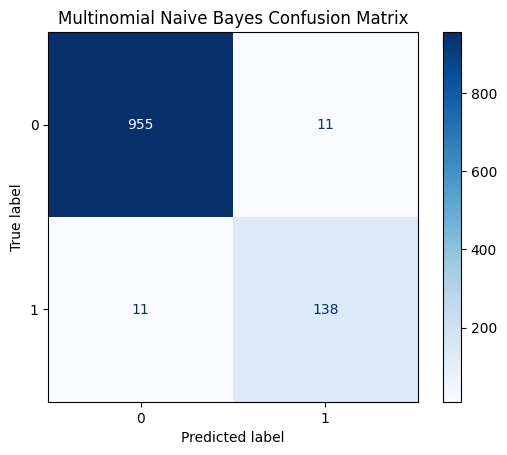



BernoulliNB ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



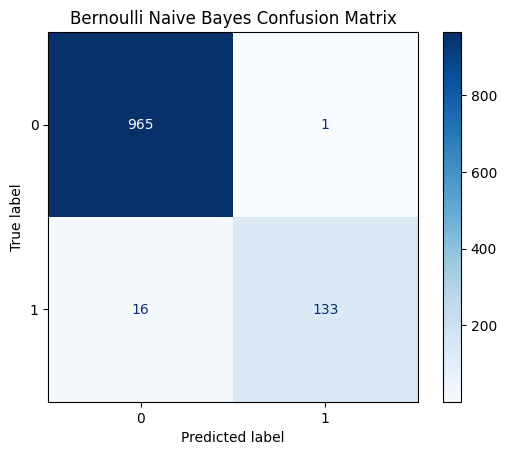



RandomForestClassifier ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



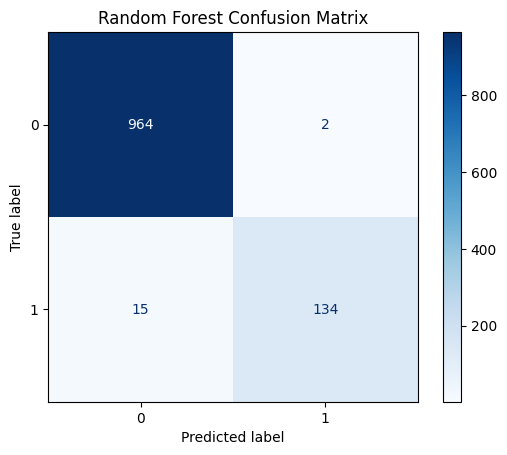



DecisionTreeClassifier ling classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.86      0.93      0.89       149

    accuracy                           0.97      1115
   macro avg       0.93      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



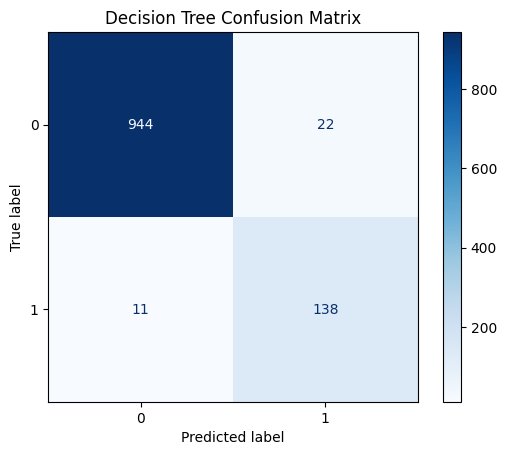



AdaBoostClassifier ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



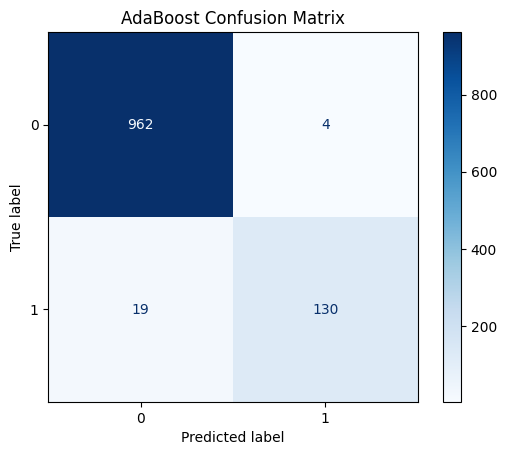



LogisticRegression ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



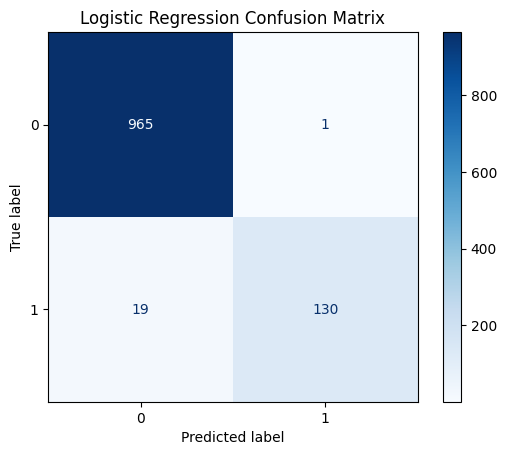



KNeighborsClassifier ling classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       1.00      0.51      0.68       149

    accuracy                           0.93      1115
   macro avg       0.96      0.76      0.82      1115
weighted avg       0.94      0.93      0.93      1115



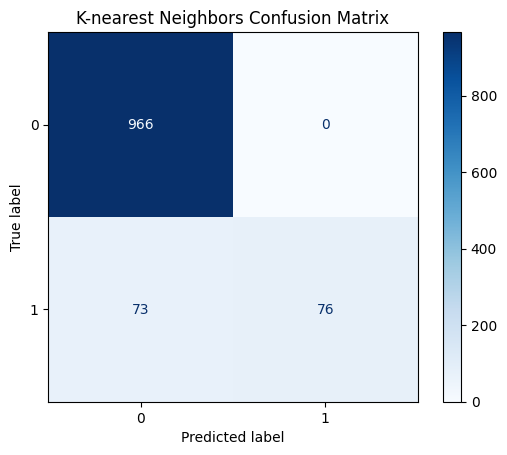

In [14]:
spam_lemmatizing_countvec = preprocessing.vectorizing(spam_lemmatizing, "countvectorizer")
for model in models:
    spam_assassin_classify = ClassificationModel(model)
    spam_assassin_classify.train(spam_lemmatizing_countvec, spam["Category_encoded"])
    print(f"{model.__class__.__name__} ling classification report")
    print(spam_assassin_classify.evaluate())
    spam_assassin_classify.draw_confusion_matrix()
    print("\n")

## Lemmatizing + TF-IDF

SVC ling classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



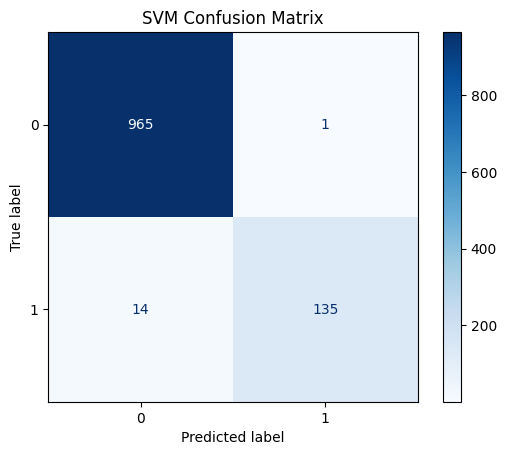



SVC ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



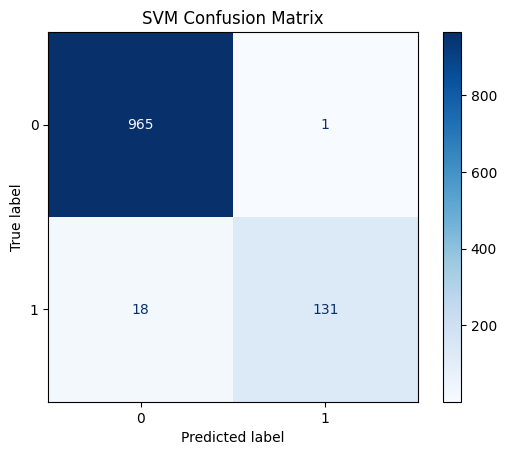



MultinomialNB ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



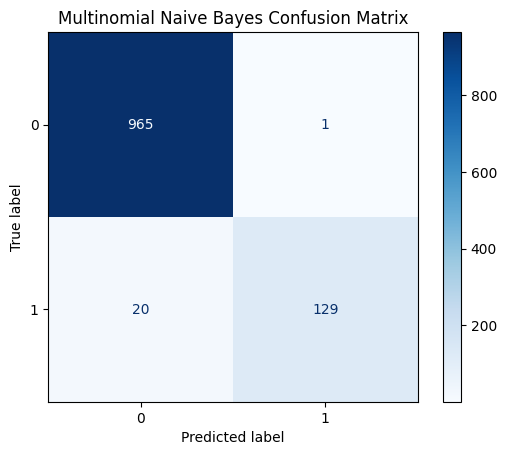



BernoulliNB ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



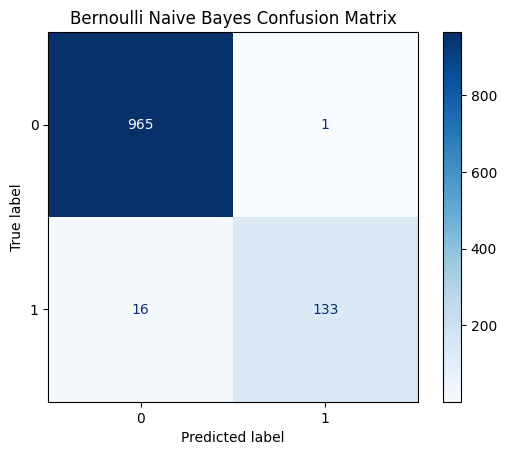



RandomForestClassifier ling classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



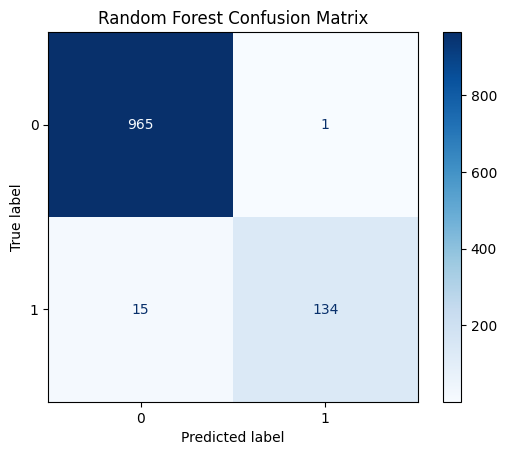



DecisionTreeClassifier ling classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.89      0.89      0.89       149

    accuracy                           0.97      1115
   macro avg       0.94      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



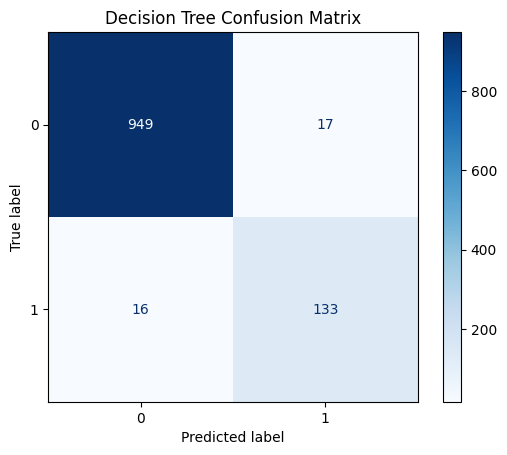



AdaBoostClassifier ling classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.86      0.90       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



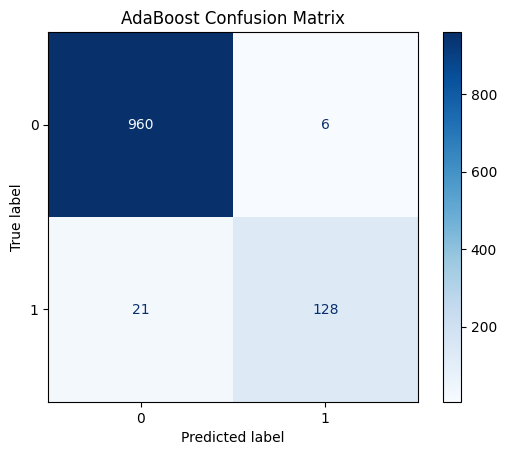



LogisticRegression ling classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



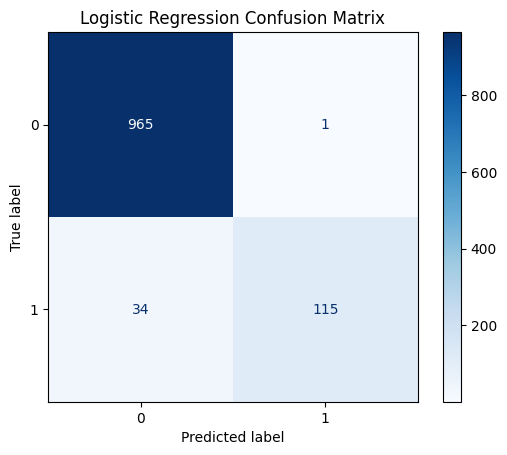



KNeighborsClassifier ling classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.47      0.64       149

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.80      1115
weighted avg       0.93      0.93      0.92      1115



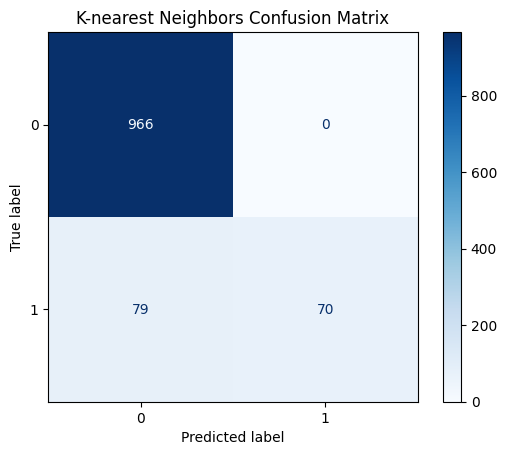

In [15]:
spam_lemmatizing_tfidf = preprocessing.vectorizing(spam_lemmatizing, "tfidf")
for model in models:
    spam_assassin_classify = ClassificationModel(model)
    spam_assassin_classify.train(spam_lemmatizing_tfidf, spam["Category_encoded"])
    print(f"{model.__class__.__name__} ling classification report")
    print(spam_assassin_classify.evaluate())
    spam_assassin_classify.draw_confusion_matrix()
    print("\n")